## PCA 2
### Visualización de Datos con Componentes Principales

**Descripción:**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

**Enlace al dataset:** [Iris](https://www.kaggle.com/uciml/iris)



### Objetivo:

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.



### Instrucciones:

1. **Carga de datos:**
  - Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
  - Asegúrate de que los datos no contengan valores nulos o atípicos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64


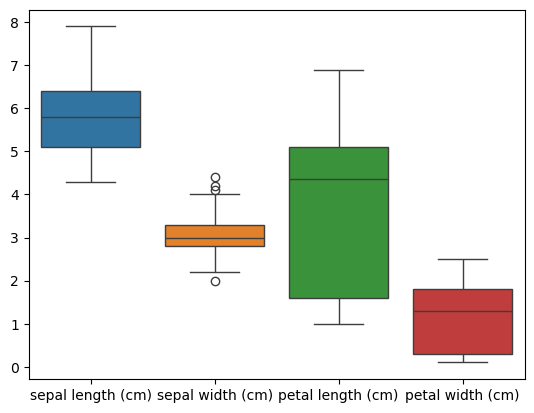

In [2]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear un DataFrame para una mejor visualización inicial
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map(lambda i: target_names[i])

# Inspeccionar los nombres de las características y las etiquetas de las clases
print("Feature names:", feature_names)
print("Target names:", target_names)

# Inspeccionar las primeras filas del DataFrame
print(df.head())

# Verificar valores nulos
print(df.isnull().sum())

# Verificar valores atípicos
sns.boxplot(data=df[feature_names])
plt.show()


2. **Exploración y preprocesamiento de datos:**
  - Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
  - Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.


Resumen de datos escalados:
Media por característica (aproximadamente 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1.]


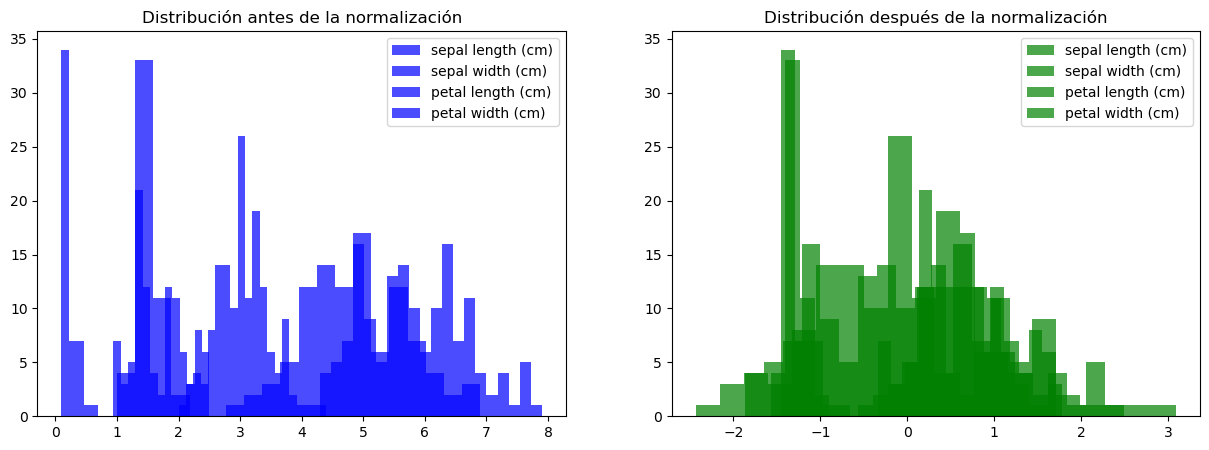

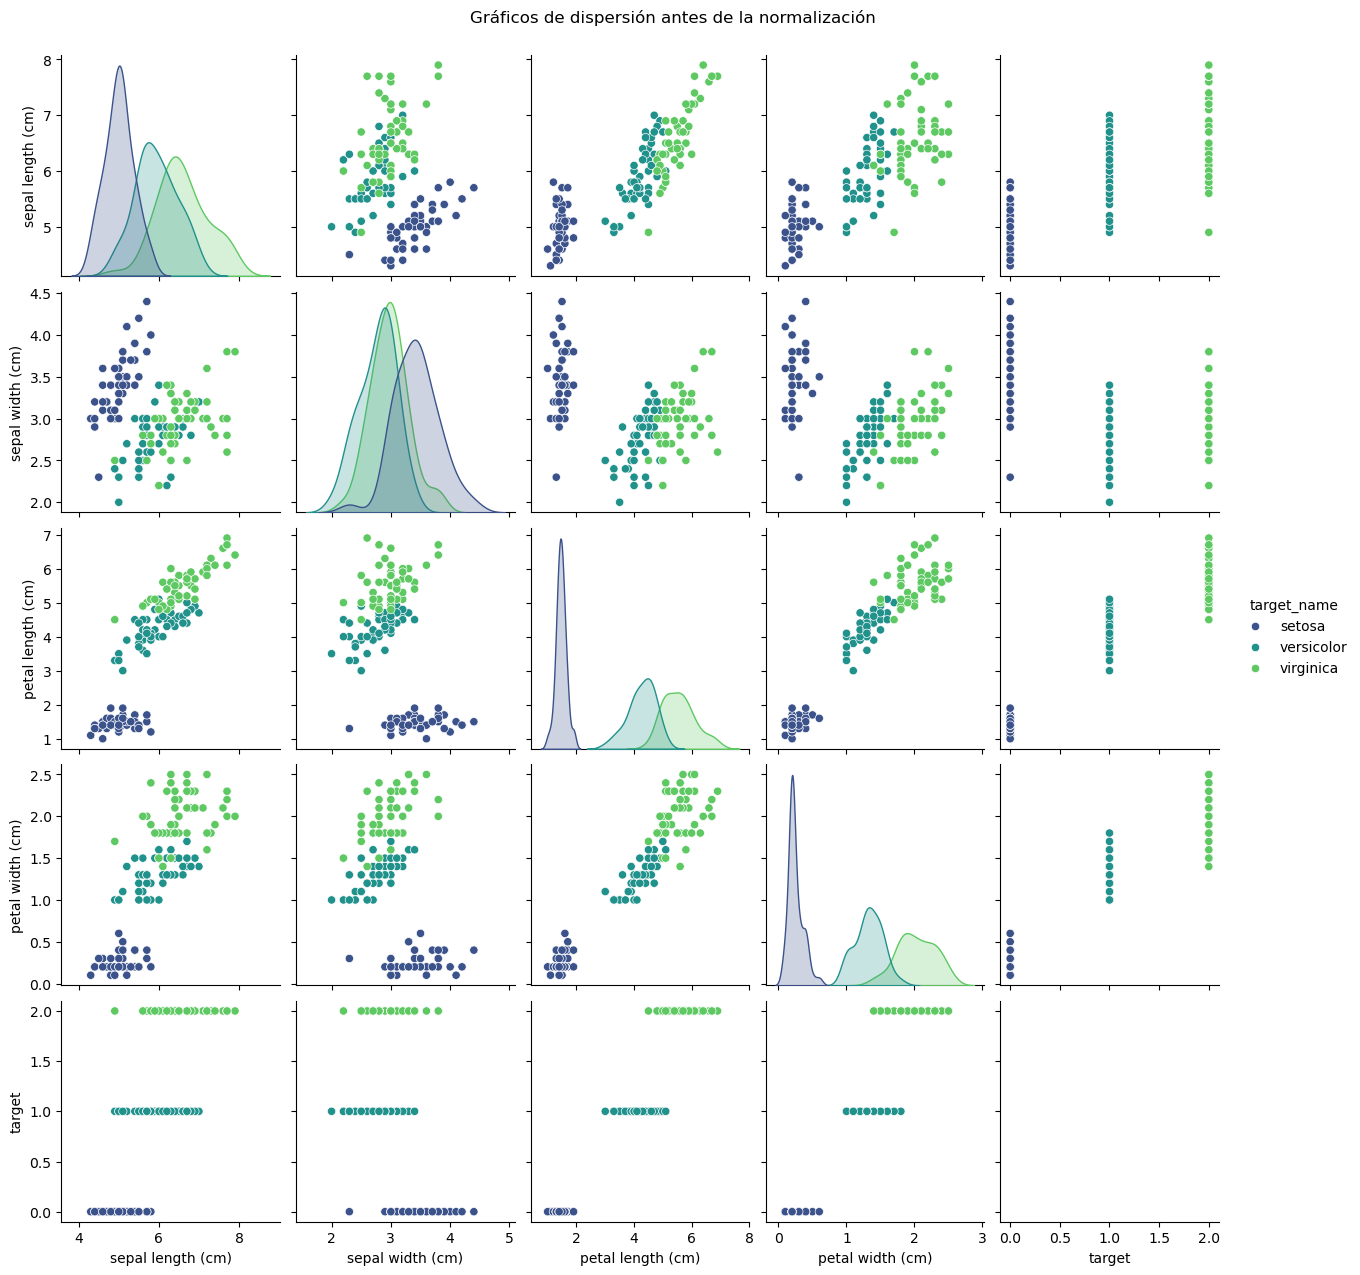

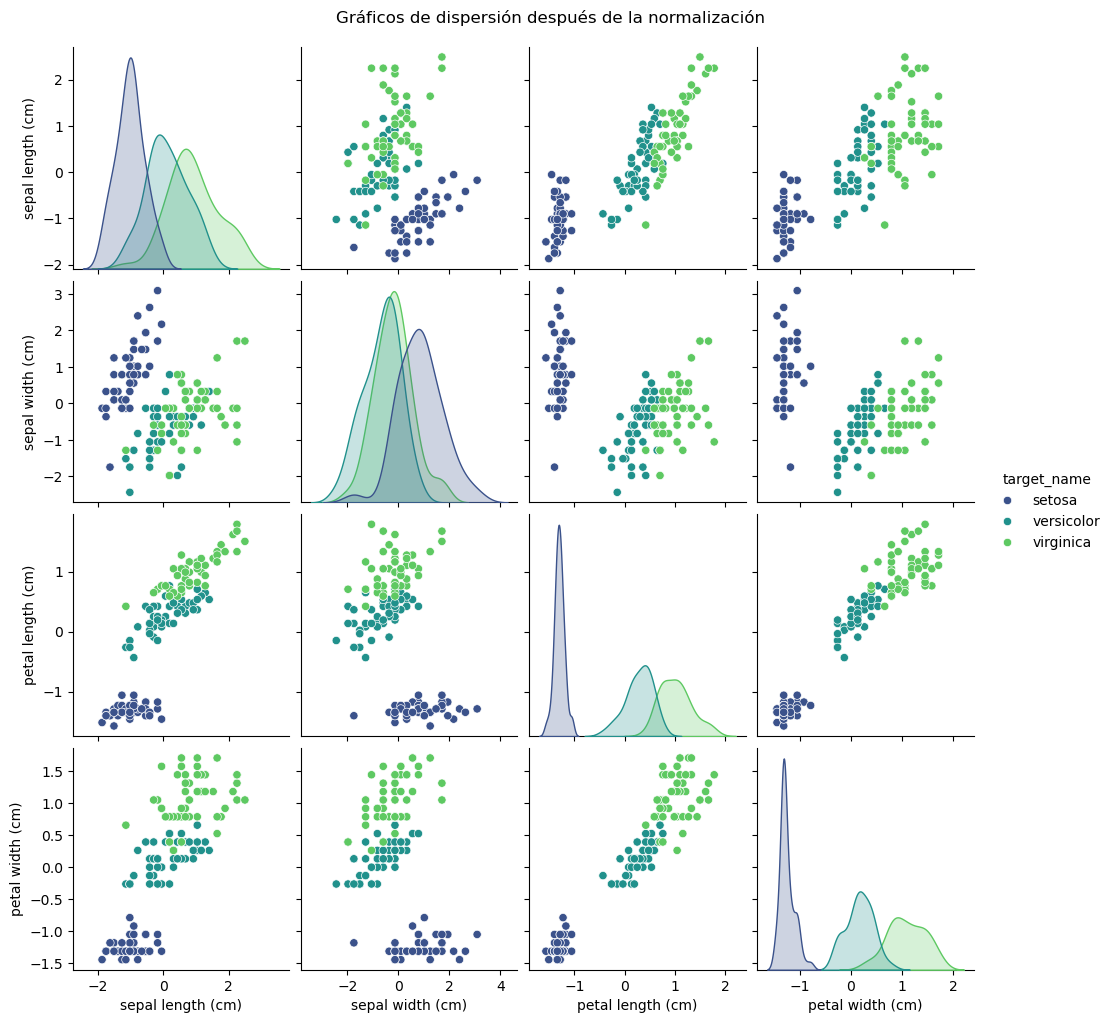

In [7]:
# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)}")

# Visualización de la distribución de las variables antes y después de la normalización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramas antes de la normalización (usando Matplotlib directamente)
for i, feature in enumerate(feature_names):
    axes[0].hist(df[feature], bins=20, color='blue', alpha=0.7, label=feature)
axes[0].set_title('Distribución antes de la normalización')
axes[0].legend()

# Histogramas después de la normalización (usando Matplotlib directamente)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
for i, feature in enumerate(feature_names):
    axes[1].hist(df_scaled[feature], bins=20, color='green', alpha=0.7, label=feature)
axes[1].set_title('Distribución después de la normalización')
axes[1].legend()

plt.show()

# Gráficos de dispersión antes de la normalización
sns.pairplot(df, hue='target_name', palette='viridis')
plt.suptitle('Gráficos de dispersión antes de la normalización', y=1.02)
plt.show()

# Gráficos de dispersión después de la normalización
df_scaled['target_name'] = df['target_name']
sns.pairplot(df_scaled, hue='target_name', palette='viridis')
plt.suptitle('Gráficos de dispersión después de la normalización', y=1.02)
plt.show()


3. **Aplicación de PCA:**
  - Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
  - Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.


In [9]:
pca_full = PCA(n_components=2)
X_pca = pca_full.fit_transform(X_scaled)

print("Forma de los datos transformados:", X_pca.shape)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")



Forma de los datos transformados: (150, 2)
Variación explicada acumulada:
Componente 1: 72.96%
Componente 2: 95.81%



4. **Visualización de los componentes principales:**
  - Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
  - Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.


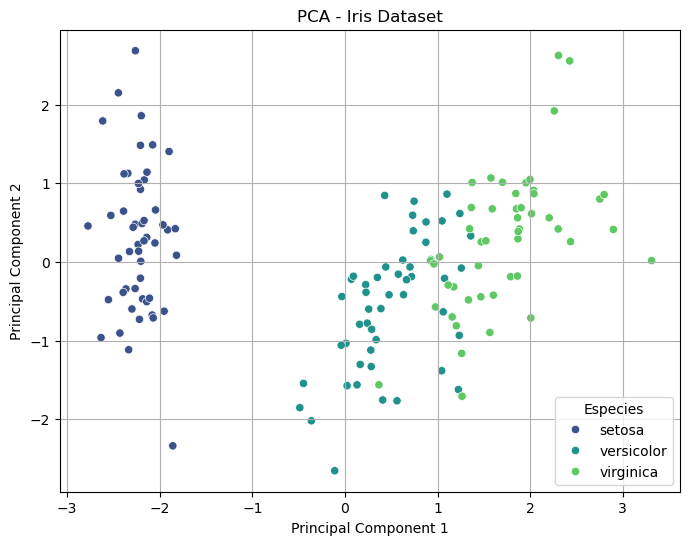

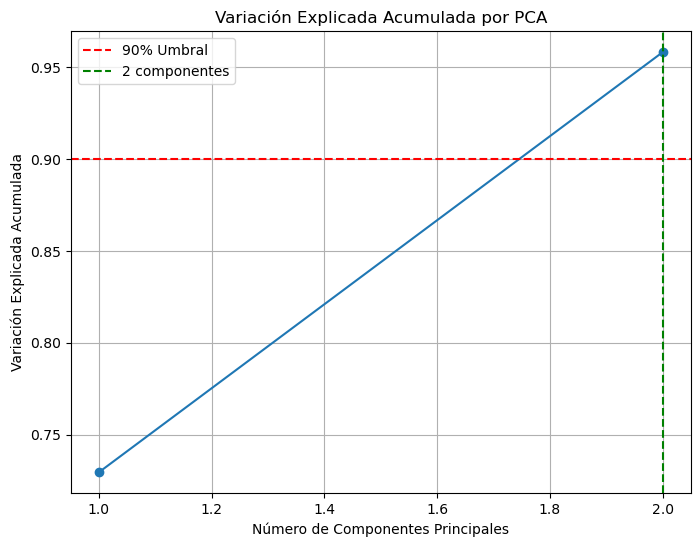

In [10]:
# Convertir los datos transformados en un DataFrame para visualización
df_pca = pd.DataFrame(X_pca, columns=["Principal Component 1", "Principal Component 2"])
df_pca['target'] = y
df_pca['target_name'] = df_pca['target'].map(lambda i: target_names[i])

# Visualización de los datos proyectados usando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="Principal Component 1", y="Principal Component 2", hue="target_name", palette='viridis')
plt.title("PCA - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Especies')
plt.grid()
plt.show()

# Gráfico de la variación explicada acumulada con umbral del 90%
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o')
plt.title("Variación Explicada Acumulada por PCA")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Variación Explicada Acumulada")
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()




5. **Interpretación de los resultados:**
  - Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
  - Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.



### Análisis de Resultados:

  - Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
  - Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.


Coeficientes de los componentes principales:
              sepal length (cm)  sepal width (cm)  petal length (cm)  \
Componente 1           0.521066         -0.269347           0.580413   
Componente 2           0.377418          0.923296           0.024492   

              petal width (cm)  
Componente 1          0.564857  
Componente 2          0.066942  


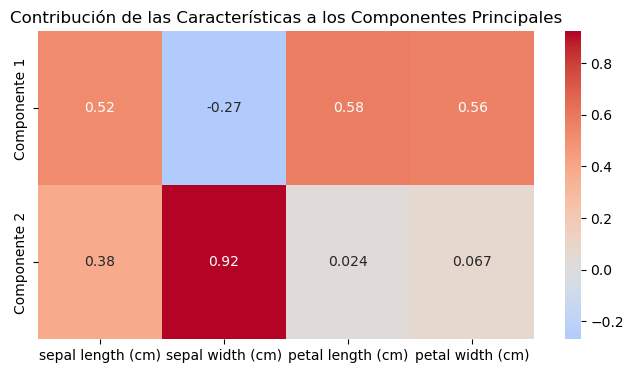

Componente 1: las caracteristicas mas influyentes estan equilibradas entre petal length, petal width y sepal length.
Componente 2: la caracteristica mas influyente es sepal width.


In [13]:
# Obtener los coeficientes de los componentes principales
components = pca_full.components_

# Crear un DataFrame para visualizar los coeficientes
df_components = pd.DataFrame(components, columns=feature_names, index=['Componente 1', 'Componente 2'])

# Mostrar los coeficientes
print("Coeficientes de los componentes principales:")
print(df_components)

# Visualizar los coeficientes con un heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_components, annot=True, cmap='coolwarm', center=0)
plt.title('Contribución de las Características a los Componentes Principales')
plt.show()

print('Componente 1: las caracteristicas mas influyentes estan equilibradas entre petal length, petal width y sepal length.')
print('Componente 2: la caracteristica mas influyente es sepal width.')



**En el gráfico de los dos componentes principales, se observa que las clases (setosa, versicolor y virginica) están bien separadas, especialmente la clase setosa, que forma un grupo distinto. Sin embargo, hay cierta superposición entre versicolor y virginica, lo que sugiere que estas dos especies son más difíciles de distinguir basándose únicamente en las características originales. PCA ha capturado más del 90% de la varianza total con solo dos componentes, lo que indica que es una técnica efectiva para reducir la dimensionalidad y visualizar la estructura de los datos en este caso.**


### Conclusión:

  - Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.